
# Ex | State transitions {.unnumbered}

In this exercise, you will apply the compentencies shown in the lecture to a Markov chain with 3 states as shown below.

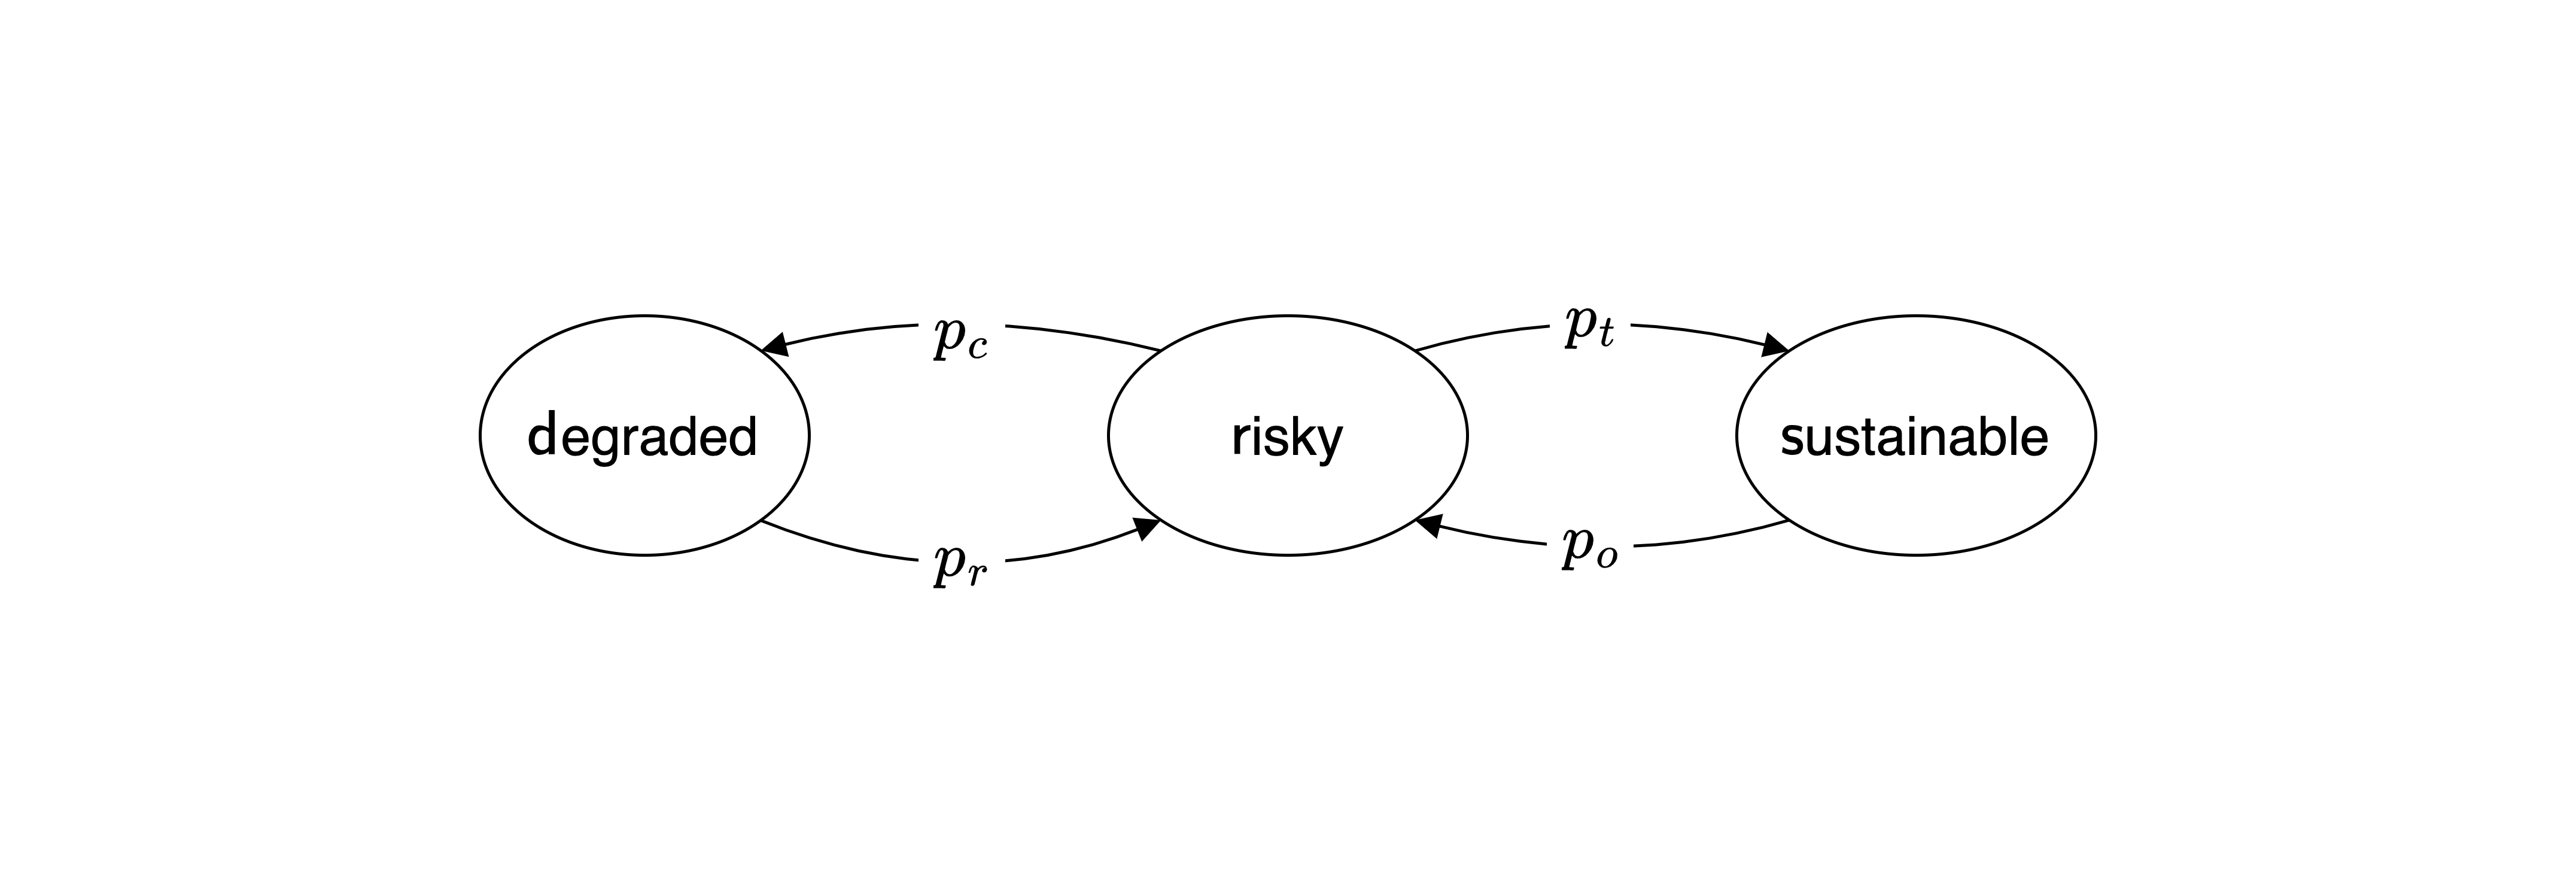

This model extents the example shown in the lecture between a prosperous and a degraded environmental state by adding a third state. The previous prosperous state is now split into two states: a risky state with a collapse probability $p_c$ to move to the degarded state from which the system transitions back to the risky state with recovery probability $p_r$, as before.

Now the risky state has also a *transformation probability* $p_t$ to transform the system into a sustainable state. Think of a combination of technological innovation and policy changes that allow the system to transition to a sustainable state. However, due to rebound effects, there is also a *overusage probability* $p_o$ that the system transitions back to the risky state.


In [25]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Step 1 | Transition matrix

Set up the transition matrix using the variable with the following default values,

In [26]:
pc = 0.005 # collapse probability
pr = 0.001 # recovery probability
pt = 0.05 # transformation probability
po = 0.01 # overusage probability (relapse to prosperous state)

Tip: Self-transitions are not shown in the diagram, but they are possible. 

In [28]:
# T = ...

Make sure and show below that the rows of the transition matrix sum up to 1, as required for a probabilistic transition matrix of a Markov chain.

In [29]:
# ...

## Step 2 | Simulation

Compare the time-evolution of an ensemble stochastic runs with the time-evolution of the state distribution.

### Step 2.1 | Stochastic run
First, simulate a stochastic run of the system for 100 time steps with the risky state as the initial state.

In [33]:
# ...

Visulaize the results in a plot.

In [53]:
# ...

### Step 2.2 | Ensemble

Second, create an ensemble of 300 stochastic runs of the system for 100 time steps with the risky state as the initial state.

In [55]:
# ...

Make sure that your variable, into which you stored the runs of the ensemble, is a two-dimensional `numpy` array with shape `(300, 100)`.

In [57]:
# ..

### Step 2.3 | Visualize the ensemble

Visualize each of the 300 trajectories in a time series plot by looping through the trajectories of the ensemble and plotting them in the same plot with a low alpha value (`plt.plot(..., alpha=0.05)`) to make the individual trajectories visible.

In [82]:
# ...

You should realize, that we cannot visulaize the average of the ensemble in a single line plot, as we did in the lecture, because the state space has three states. 

Takeing the average of the numerical values representing the states does not make sense in this case. For example, if the risky state is represented by the number 1, the sustainable state by the number 0, and the degraded state by the number 2, the average of the ensemble could not distinguish between all probability in the risky state and 50% in the sustainable and degraded state.

But we still can visualize the evolution of the distribution of the ensemble at each time step. 

To do so, we need to transform our ensemble of 300 stochastic runs into a distribution of the ensemble at each time step. We can do so by counting the number of state visits in the ensemble at each time step. The `numpy.histogram` function can help us with this task. Suppose that the ensemble is stored in the variable `ensemble` with shape `(300, 100)`. Then, the following code snippet will count the number of visits of each state in the ensemble at the first time step:

```python
stochastic_evolution = np.array([np.histogram(samp, bins=3, range=(0,2))[0] for samp in ensemble.T])
```

The loop through `ensemble.T` iterates through each time step. The `np.histogram` function counts the number of visits of each state in the ensemble at each time step. The `bins=3` argument specifies that we have three states, and the `range=(0,2)` argument specifies that the states' numerical representations are in the range from 0 to 2. The `[0]` at the end of the list comprehension extracts the counts of the states from the histogram function. 

Apply this code snippet to the ensemble and make sure that the variable `stochastic_evolution` has the shape `(100, 3)`.

In [74]:
# ...

Finally, visualize the state distribution over time using the `plt.imshow` function. The x-axis should represent the time steps, and the y-axis should represent the states. The color intensity should represent the number of visits of each state at each time step. A code like this should do the job:

```python
plt.imshow(stochastic_evolution.T, aspect='auto', interpolation='None')
```


In [80]:
# ...

### Step 2.4 | State distribution evolution

To compare this result to the time evolution of the state distribution, you first need to compute the latter.

In [84]:
# ..

Check that the sum of your state distribution evolution at each time step is equal to 1.

In [116]:
# ..

Finally, visualize the state distribution evolution over time using the `plt.imshow` function as above.

In [118]:
# ...

You should observe that both plot look similar, but the state distribution evolution is smoother than the ensemble plot. This is because the ensemble plot results from the individual trajectories, while the state distribution evolution plot shows the average of the ensemble at each time step.

## Step 3 | Stationary distribution

Compute the stationary distribution of the system by computing the eigenvector of the transition matrix corresponding to the eigenvalue 1, first numerically and then analytically.

### Step 3.1 | Numerical solution

Use the `numpy.linal.eig` method to compute the stationary distribution of the system. Make sure to normalize the correct eigenvector to sum up to 1, as it represents a probability distribution.

In [104]:
# ...

How does the result compare to the time-evolution above? 

Does the system reach the stationary distribution at the end?

If not, what does that say about the time evolution simulations above?

# ...

### Step 3.1 | Symbolic solution

Construct the transition matrix symbolically using the `sympy` package and compute the stationary distribution of the system analytically.

In [120]:
# ...

Interpret your result

# ...